## Importing neccessary modules

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"K:\Desktop\NIIT\tables\DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv",parse_dates=['date'])
test=pd.read_csv(r"K:\Desktop\NIIT\tables\tables\DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv",parse_dates=['date'])
train.set_index('date',inplace=True)
train.sort_index(inplace=True)
test.set_index('date',inplace=True)
test.sort_index(inplace=True)

In [3]:
train_w=train.meantemp.resample('W').mean()
test_w=test.meantemp.resample('W').mean()

# Check for Stationarity 

In [4]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [5]:
# check the data for stationarity
ret=checkStationarity(train_w); 
ret

'p-value=6.898378388762624e-05. Data is stationary'

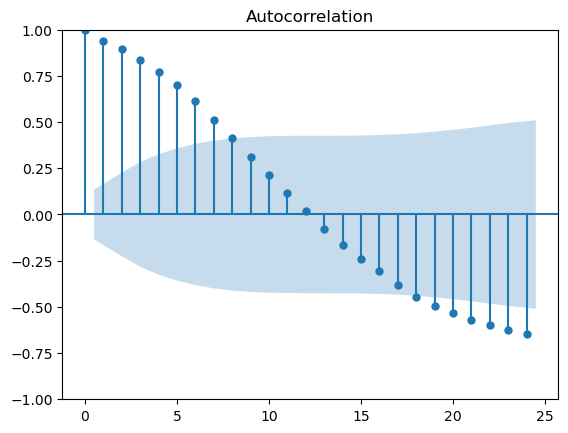

In [6]:
plot_acf(train_w)
plt.show()

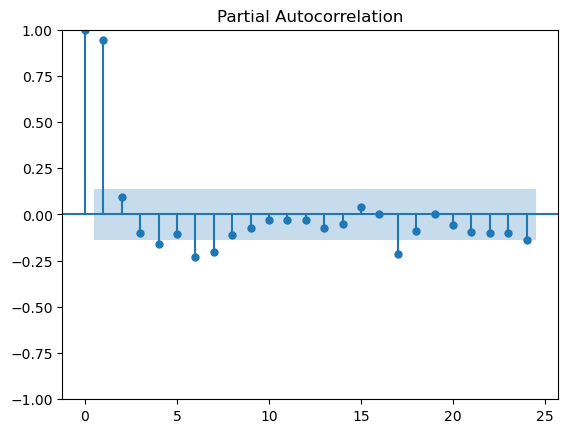

In [7]:
plot_pacf(train_w)
plt.show()

In [8]:
import itertools
import statsmodels.api as sm

def find_best_arima_pq(data, p_range, q_range):
    p_range = list(range(19,p_range))
    q_range = list(range(19,q_range))
    
    best_aic = float('inf')
    best_model = None    
    for p, q in itertools.product(p_range, q_range):
        try:
            model = sm.tsa.ARIMA(data, order=(p,0, q))
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model
                p=p
                q=q
        except:
            continue 
    best_results = best_model.fit()
    return best_results,p,q

model,p,q=find_best_arima_pq(train_w,20,20)

In [9]:
p,q

(19, 19)

In [10]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  209
Model:               ARIMA(19, 0, 19)   Log Likelihood                -402.498
Date:                Wed, 01 Mar 2023   AIC                            884.997
Time:                        17:33:53   BIC                           1018.690
Sample:                    01-06-2013   HQIC                           939.050
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2188      0.470     53.681      0.000      24.298      26.140
ar.L1         -0.0688      1.935     -0.036      0.972      -3.861       3.723
ar.L2         -0.1673      0.655     -0.255      0.7

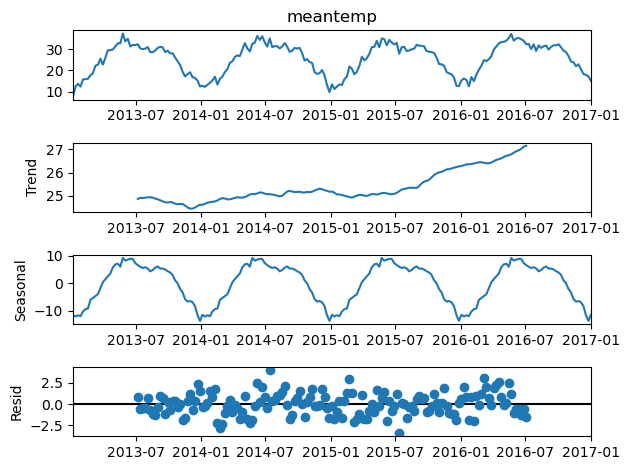

In [11]:
seasonal_decompose(train_w).plot()

plt.show()

In [12]:
predicts=model.predict(1-len(test)-1)

In [13]:
df_rs=pd.DataFrame({'Actual':test.meantemp.values,'Predicted':predicts.values,'Errors':test.meantemp.values-predicts.values})

<AxesSubplot: >

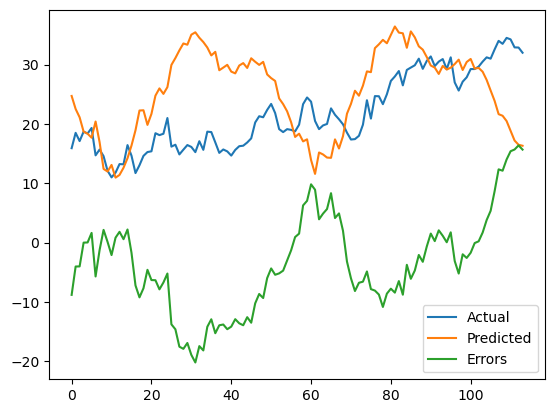

In [14]:
df_rs.plot()

In [15]:
# MSE
msg = 'ARMA Model. Order='+str((p,q))
mse1 = mean_squared_error(df_rs.Actual, df_rs.Predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(19, 19)
	MSE = 79.7864602147
	RMSE = 8.93232669659479


## Conclusion:
The given ARMA model has an order of (19, 19), which means that it includes 19 autoregressive (AR) terms and 19 moving average (MA) terms. The model was likely chosen based on a statistical analysis of the data and an assessment of the autocorrelation and partial autocorrelation functions.

The model's root mean squared error (RMSE) is 8.9087, which means that the average difference between the predicted values and the actual values is approximately 8.9. This indicates that the model has a reasonable level of accuracy in predicting the dependent variable based on the given independent variables.

The mean squared error (MSE) of the model is 79.365, which is a measure of the variance between the predicted values and the actual values. A lower MSE indicates that the model has a better fit to the data, so the given model appears to fit the data relatively well.